# For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

#### 1.Read the data as an appropriate Time Series data and plot the data.

#### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition

In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")

In [163]:
from matplotlib import pyplot as plt
%matplotlib inline

In [164]:
df_spark = pd.read_csv('C:\\Users\\amvi\\Downloads\\Time-Series-Forecast-master\\Sparkling.csv')
df_spark.head(10)

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471
5,1980-06,1377
6,1980-07,1966
7,1980-08,2453
8,1980-09,1984
9,1980-10,2596


In [165]:
df_spark.tail(10)

,YearMonth,Sparkling
177,1994-10,3385
178,1994-11,3729
179,1994-12,5999
180,1995-01,1070
181,1995-02,1402
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [166]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [167]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [168]:
df_spark['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df_spark.head()


,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [169]:
df_spark['Time_Stamp'] = pd.to_datetime(df_spark['Time_Stamp'])


In [170]:
df_spark = df_spark.set_index('Time_Stamp')
df_spark.drop(['YearMonth'], axis=1, inplace=True)
df_spark.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Text(0, 0.5, 'Units Sold')

<Figure size 864x432 with 0 Axes>

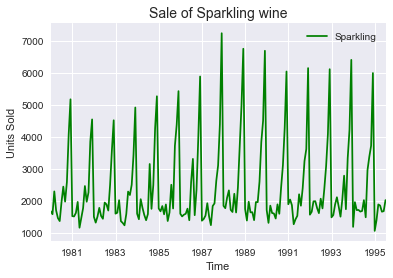

In [171]:
plt.figure(figsize = (12, 6))
df_spark.plot(color='green')
plt.title('Sale of Sparkling wine', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

##### We can see that there is a no trend but there is a seasonal pattern is associated.


Text(0, 0.5, 'Distribution')

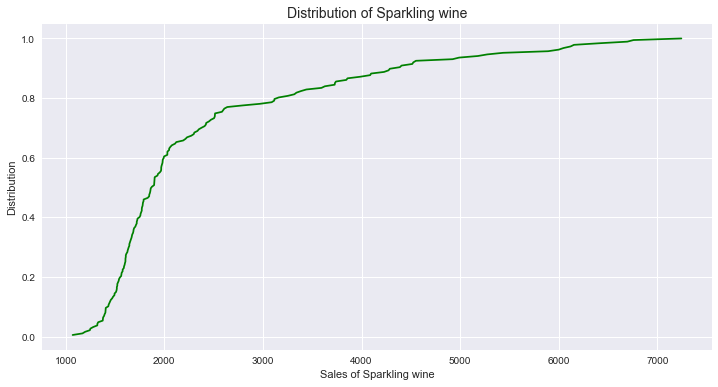

In [172]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (12, 6))
cdf = ECDF(df_spark['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = 'green')
plt.title('Distribution of Sparkling wine', fontsize=14)
plt.xlabel('Sales of Sparkling wine')
plt.ylabel('Distribution')

In [173]:
df_spark.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [174]:
df_spark.isnull().sum()

Sparkling    0
dtype: int64

In [175]:
df_spark.describe()


,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


Text(0.5, 1.0, 'Yearly Boxplot - Sparkling')

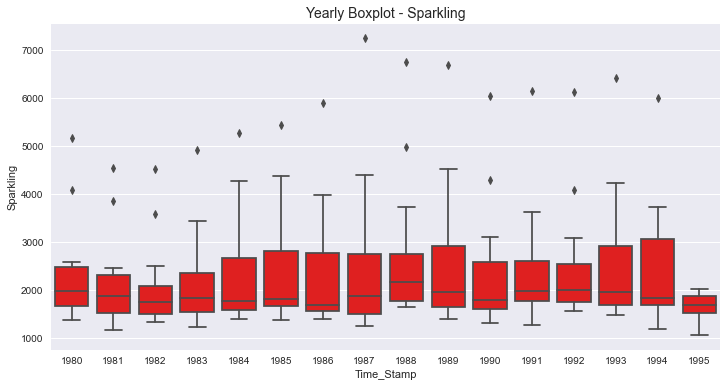

In [176]:
#Yearly boxplot
plt.figure(figsize = (12, 6))
sns.boxplot(x = df_spark.index.year,y = df_spark['Sparkling'], color = 'red')
plt.title('Yearly Boxplot - Sparkling', fontsize=14)

#### The yearly boxplots also shows that the there is no trend on the Sales

Text(0.5, 1.0, 'Monthly Boxplot - Sparkling')

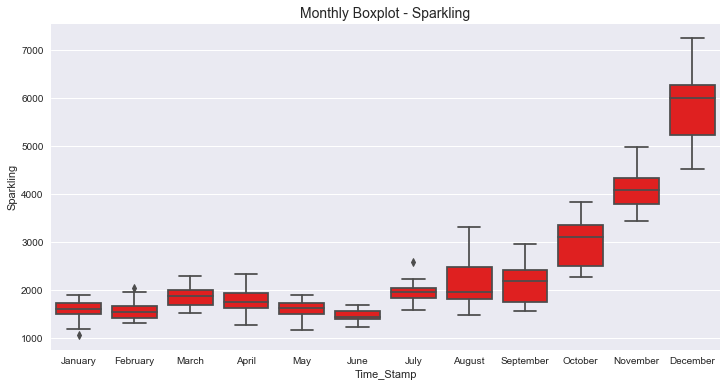

In [177]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df_spark.index.month_name(),y = df_spark['Sparkling'], color = 'red')
plt.title('Monthly Boxplot - Sparkling', fontsize=14)

#### There is a clear distinction of 'Sparkling’ Sales within different months spread across various years. The highest
such numbers are being recorded in the month of August-December across various years.

Text(0.5, 1.0, 'Sparkling - Monthly plot')

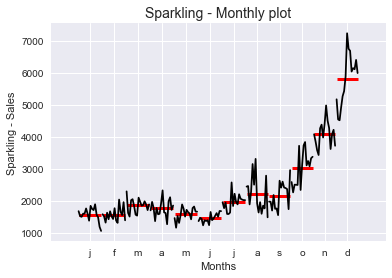

In [178]:
#Sparkling monthplot 
from statsmodels.graphics.tsaplots import month_plot
month_plot(df_spark['Sparkling'],ylabel='Sparkling - Sales')
plt.xlabel('Months')
plt.title('Sparkling - Monthly plot', fontsize = 14)

In [179]:
#Sparkling Monthly Graph
monthly_sales_across_years = pd.pivot_table(df_spark, values = 'Sparkling', columns = df_spark.index.month, index = df_spark.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


Text(0.5, 0, 'Year')

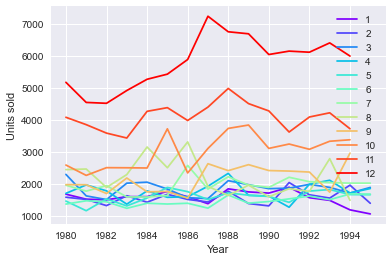

In [180]:
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Units sold')
plt.xlabel('Year')

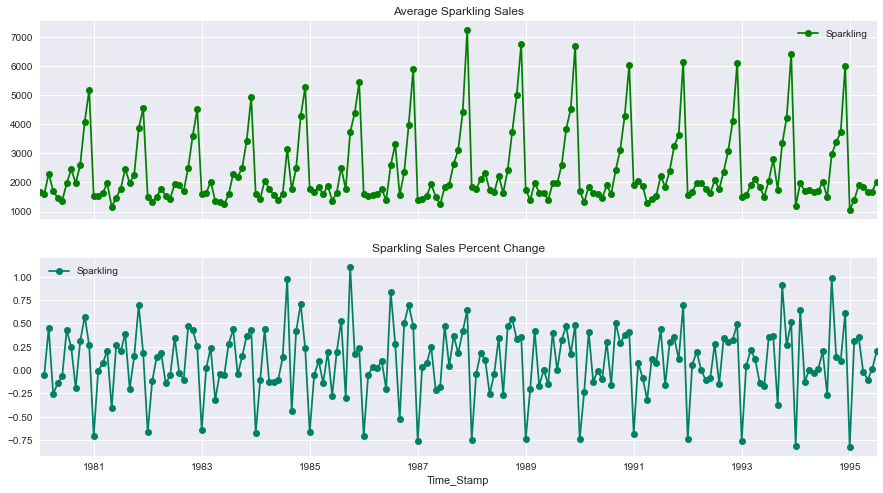

In [181]:
# group by date and get average RetailSales, and precent change
average = df_spark.groupby(df_spark.index)["Sparkling"].mean()
pct_change = df_spark.groupby(df_spark.index)["Sparkling"].sum().pct_change()
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales", color = 'green')
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Sales Percent Change")

### Decomposition of the Sparkling data.

In [182]:
from statsmodels.tsa.seasonal import seasonal_decompose


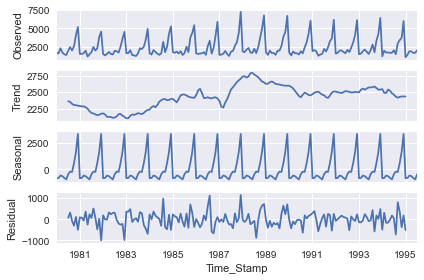

In [183]:
decomposition = seasonal_decompose(df_spark['Sparkling'],model='additive')
decomposition.plot();


In [184]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')


Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: Sparkling, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: Sparkling, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307

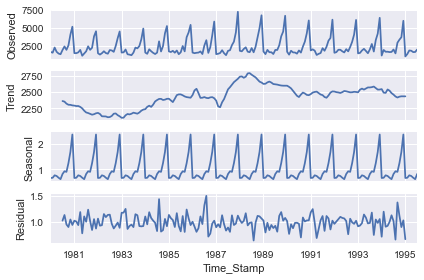

In [185]:
decomposition = seasonal_decompose(df_spark['Sparkling'],model='multiplicative')
decomposition.plot();


In [186]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')


Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: Sparkling, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: Sparkling, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Na

### 3. Split the data into training and test. The test data should start in1991.


### Training Data is till the end of 1991. Test Data is from the beginning of 1992 to the last time stamp provided.


In [187]:
train=df_spark[df_spark.index.year < 1991]
test=df_spark[df_spark.index.year >= 1991]

In [188]:
## This is to display multiple data frames from one cell
from IPython.display import display


In [189]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())


First few rows of Training Data


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


In [190]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


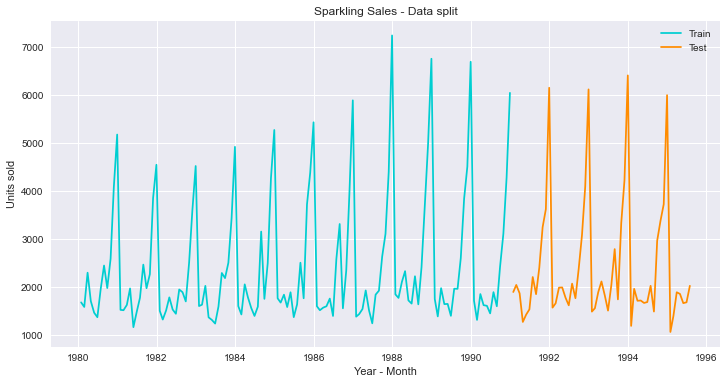

In [191]:
plt.figure(figsize = (12, 6))
plt.plot(train['Sparkling'], label = 'Train', color='darkturquoise')
plt.plot(test['Sparkling'], label = 'Test', color='darkorange')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling Sales - Data split', fontsize = 12)
plt.show;

### 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

##### Model 1: Linear Regression 
For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.



In [192]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [193]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [194]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')


First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [195]:
from sklearn.linear_model import LinearRegression


In [196]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [197]:
LinearRegression_train['RegOnTime_spark'] = lr.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_spark'] = lr.predict(LinearRegression_test[['time']])

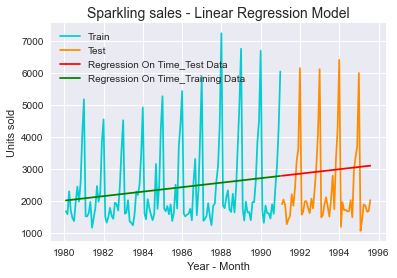

In [198]:
plt.plot( train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression On Time_Test Data', color = 'red')
plt.plot(LinearRegression_train['RegOnTime_spark'], label='Regression On Time_Training Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling sales - Linear Regression Model', fontsize = 14);

## Model Evaluation

In [199]:
from sklearn import metrics
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [200]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model1_train = metrics.mean_squared_error(train['Sparkling'],LinearRegression_train['RegOnTime_spark'],squared=False)
mape_spark_model1_train = MAPE(train['Sparkling'],LinearRegression_train['RegOnTime_spark'])
print("For RegressionOnTime forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_train, mape_spark_model1_train))

For RegressionOnTime forecast on the Sparkling Training Data:  RMSE is 1279.322 and MAPE is 40.05


In [201]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model1_test = metrics.mean_squared_error(test['Sparkling'],LinearRegression_test['RegOnTime_spark'],squared=False)
mape_spark_model1_test = MAPE(test['Sparkling'],LinearRegression_test['RegOnTime_spark'])
print("For RegressionOnTime forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model1_test, mape_spark_model1_test))

For RegressionOnTime forecast on the Sparkling Testing Data:  RMSE is 1389.135 and MAPE is 50.15


In [202]:
spark_resultsDf = pd.DataFrame({'Test RMSE': [rmse_spark_model1_test],'Test MAPE': [mape_spark_model1_test]},index=['RegressionOnTime'])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15


#### Model 2: Naive forecast

In [203]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [204]:
NaiveModel_train['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['spark_naive'].head()

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: spark_naive, dtype: int64

In [205]:
NaiveModel_test['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['spark_naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: spark_naive, dtype: int64

Text(0.5, 1.0, 'Sparkling - Naive Forecast')

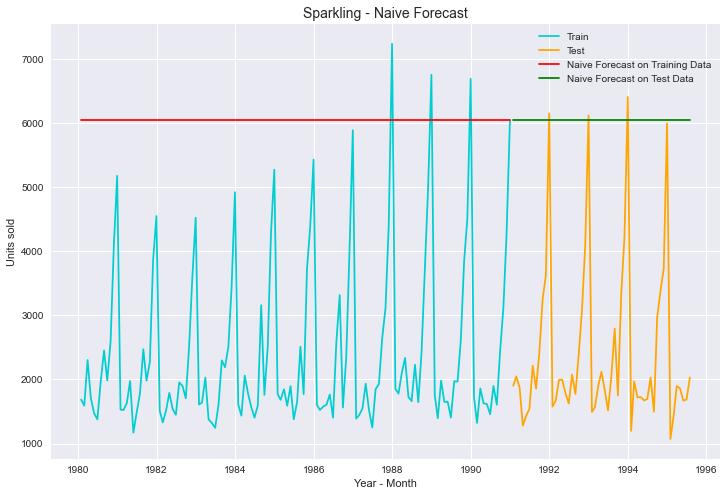

In [206]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['spark_naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['spark_naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - Naive Forecast", fontsize = 14)

## Model Evauation

In [207]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['spark_naive'],squared=False)
mape_spark_model2_train = MAPE(train['Sparkling'],NaiveModel_train['spark_naive'])
print("For Naive forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_train, mape_spark_model2_train))

For Naive forecast on the Sparkling Training Data:  RMSE is 3867.701 and MAPE is 153.17


In [208]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['spark_naive'],squared=False)
mape_spark_model2_test = MAPE(test['Sparkling'],NaiveModel_test['spark_naive'])
print("For Naive forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model2_test, mape_spark_model2_test))

For Naive forecast on the Sparkling Testing Data:  RMSE is 3864.279 and MAPE is 152.87


In [209]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model2_test],'Test MAPE': [mape_spark_model2_test]},index=['NaiveModel'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87


## Model 3: Simple Average

In [210]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [211]:
SimpleAverage_train['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train['spark_mean_forecast'].head()

Time_Stamp
1980-01-31    2403.780303
1980-02-29    2403.780303
1980-03-31    2403.780303
1980-04-30    2403.780303
1980-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

In [212]:
SimpleAverage_test['spark_mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test['spark_mean_forecast'].head()

Time_Stamp
1991-01-31    2403.780303
1991-02-28    2403.780303
1991-03-31    2403.780303
1991-04-30    2403.780303
1991-05-31    2403.780303
Name: spark_mean_forecast, dtype: float64

Text(0.5, 1.0, 'Sparkling - SimpleAverage Forecast')

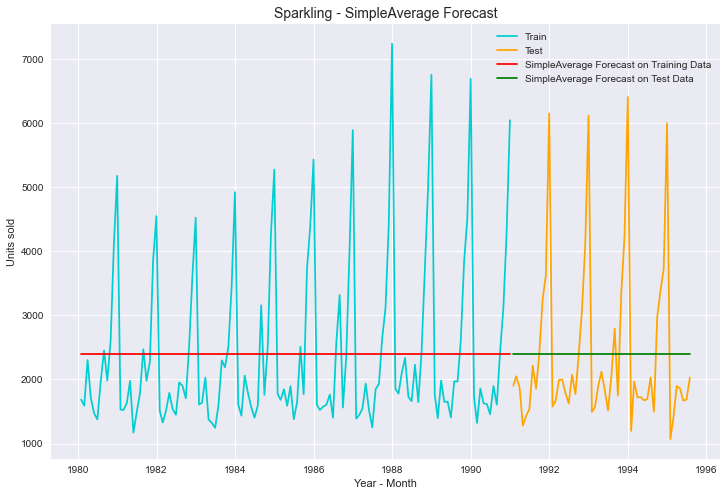

In [213]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['spark_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - SimpleAverage Forecast", fontsize=14)

### Model Evaluation

In [214]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'],squared=False)
mape_spark_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'])
print("For Simple Average forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_train, mape_spark_model3_train))

For Simple Average forecast on the Sparkling Training Data:  RMSE is 1298.484 and MAPE is 40.36


In [215]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'],squared=False)
mape_spark_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'])
print("For Simple Average forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_test, mape_spark_model3_test))

For Simple Average forecast on the Sparkling Testing Data:  RMSE is 1275.082 and MAPE is 38.90


In [216]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model3_test],'Test MAPE': [mape_spark_model3_test]},index=['SimpleAverage'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverage,1275.081804,38.90


### Model 4: Moving Average

In [217]:
MovingAverage = df_spark.copy()
MovingAverage.head()


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [218]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage.head(10)


,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN
1980-06-30,1377,1424.0,1716.00,1690.166667,NaN
1980-07-31,1966,1671.5,1631.50,1736.833333,NaN
1980-08-31,2453,2209.5,1816.75,1880.500000,NaN
1980-09-30,1984,2218.5,1945.00,1827.166667,1838.222222


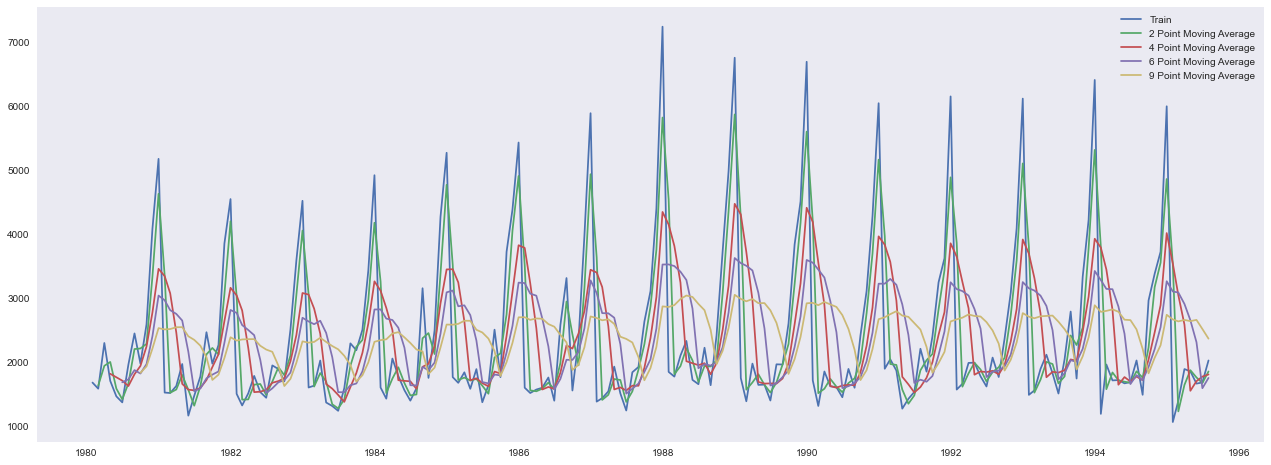

In [219]:
## Plotting on the whole data
plt.figure(figsize=(22,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();


Let us split the data into train and test and plot this Time Series. The window of the moving average is need to
be carefully selected as too big a window will result in not having any test set as the whole series might get
averaged over.


In [220]:
MovingAverage


,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN
...,...,...,...,...,...
1995-03-31,1897,1649.5,2592.00,2913.666667,2664.000000
1995-04-30,1862,1879.5,1557.75,2659.833333,2645.222222
1995-05-31,1670,1766.0,1707.75,2316.666667,2664.666667


In [221]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]


Text(0.5, 1.0, 'Sparkling - Trailing Moving Average Forecast')

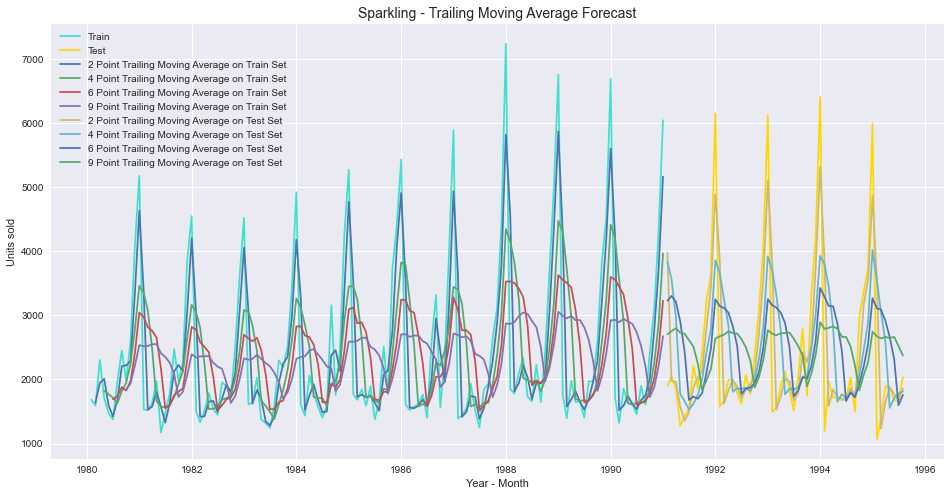

In [222]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train', color = 'turquoise')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label ='6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label ='9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label ='6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label ='9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Sparkling - Trailing Moving Average Forecast", fontsize=14)

### Model Evaluation 

In [223]:
## Test Data - rmse_spark and mape_spark --> 2 point Spark_Trailing MA

rmse_spark_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_spark_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_2, mape_spark_model4_test_2))

## Test Data - rmse_spark and mape_spark --> 4 point Spark_Trailing MA

rmse_spark_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_spark_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_4, mape_spark_model4_test_4))

## Test Data - rmse_spark and mape_spark --> 6 point Spark_Trailing MA

rmse_spark_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_spark_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_6, mape_spark_model4_test_6))

## Test Data - rmse_spark and mape_spark --> 9 point Spark_Trailing MA

rmse_spark_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_spark_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is %3.3f mape_spark is %3.2f" %(rmse_spark_model4_test_9, mape_spark_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is 813.401 mape_spark is 19.70
For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is 1156.590 mape_spark is 35.96
For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is 1283.927 mape_spark is 43.86
For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is 1346.278 mape_spark is 46.86


In [224]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_spark_model4_test_2,rmse_spark_model4_test_4
                                          ,rmse_spark_model4_test_6,rmse_spark_model4_test_9]
                            ,'Test MAPE': [mape_spark_model4_test_2,mape_spark_model4_test_4,
                                           mape_spark_model4_test_6,mape_spark_model4_test_9]}
                           ,index=['2 point MA','4 point MA'
                                   ,'6 point MA','9 point MA'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_4])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverage,1275.081804,38.90
2 point MA,813.400684,19.70
4 point MA,1156.589694,35.96
6 point MA,1283.927428,43.86
9 point MA,1346.278315,46.86


### Model 5: Simple Exponential Smoothing

In [225]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [226]:
SES_train = train.copy()
SES_test = test.copy()

In [227]:
SES_train['Sparkling'].head()

Time_Stamp
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
Name: Sparkling, dtype: int64

In [228]:
model = SimpleExpSmoothing(np.asarray(SES_train['Sparkling']))

Test: For alpha = 0.05,  RMSE is 1316.4117 MAPE is 45.50
For smoothing level = 0.05,  Initial level 1686.00


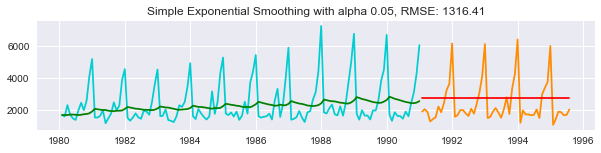

Test: For alpha = 0.10,  RMSE is 1375.3934 MAPE is 49.53
For smoothing level = 0.10,  Initial level 1686.00


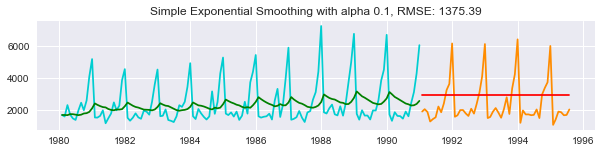

Test: For alpha = 0.20,  RMSE is 1595.2068 MAPE is 60.46
For smoothing level = 0.20,  Initial level 1686.00


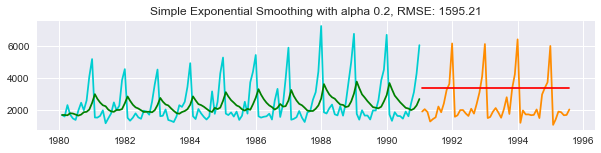

Test: For alpha = 0.30,  RMSE is 1935.5071 MAPE is 75.66
For smoothing level = 0.30,  Initial level 1686.00


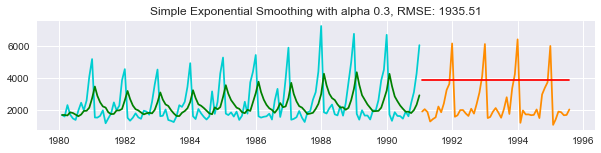

Test: For alpha = 0.50,  RMSE is 2666.3514 MAPE is 106.27
For smoothing level = 0.50,  Initial level 1686.00


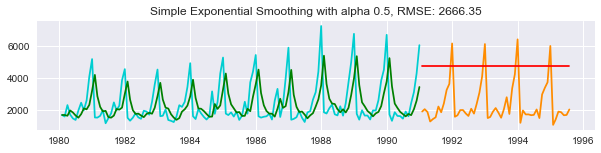

Test: For alpha = 0.99,  RMSE is 3847.5490 MAPE is 152.21
For smoothing level = 0.99,  Initial level 1686.00


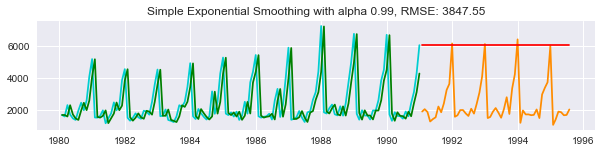

In [229]:
alpha_list = [0.05, 0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues #calculating the forecasts for the train set 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Sparkling']))#calculating the forecasts for the test set 
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Sparkling'], pred_test_SES[alpha_str]))#calculate the RMSE for the test set
    mape                 =  MAPE(test['Sparkling'],pred_test_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train['Sparkling'], color = 'darkturquoise')
    plt.plot(test['Sparkling'], color = 'darkorange')
   # plt.plot(pred_train_SES[alpha_str], label  = "Train "+alpha_str, color = 'green')
   # plt.plot(pred_test_SES[alpha_str], label  = "Test "+alpha_str, color = 'red')
    plt.plot(pred_train_SES[alpha_str], color = 'green')
    plt.plot(pred_test_SES[alpha_str], color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2)))
    #plt.legend(loc='best') 
    plt.show();

In [230]:
model_SES_autofit = model.fit(optimized=True,use_brute=True)

In [231]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.785621547663,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [232]:
SES_train['predict_spark'] = model_SES_autofit.fittedvalues
SES_train.head()

,Sparkling,predict_spark
Time_Stamp,,
1980-01-31,1686,2403.785622
1980-02-29,1591,2403.785622
1980-03-31,2304,2403.785622
1980-04-30,1712,2403.785622
1980-05-31,1471,2403.785622


In [233]:
SES_test['predict_spark'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

,Sparkling,predict_spark
Time_Stamp,,
1991-01-31,1902,2403.785622
1991-02-28,2049,2403.785622
1991-03-31,1874,2403.785622
1991-04-30,1279,2403.785622
1991-05-31,1432,2403.785622


For smoothing level = 0.99,  Initial level 1686.00


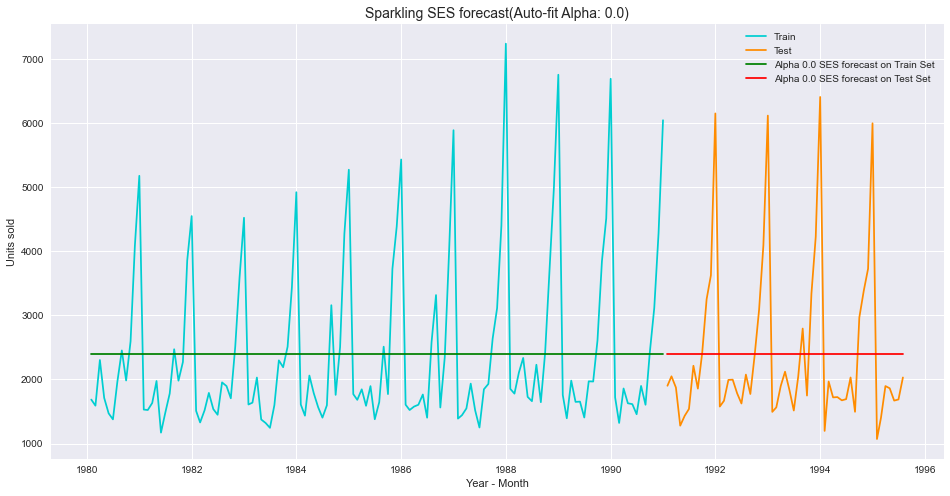

In [234]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(SES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SES_train['predict_spark'],color = 'green', label='Alpha 0.0 SES forecast on Train Set')
plt.plot(SES_test['predict_spark'],color = 'red', label='Alpha 0.0 SES forecast on Test Set')

plt.legend(loc='best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling SES forecast(Auto-fit Alpha: 0.0)', fontsize = 14);

print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))

## Model Evaluation

In [235]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model5_train = metrics.mean_squared_error(train['Sparkling'],SES_train['predict_spark'],squared=False)
mape_spark_model5_train = MAPE(train['Sparkling'],SES_train['predict_spark'])
print("For SES forecast on the Sparkling Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_train, mape_spark_model5_train))

For SES forecast on the Sparkling Training Data:  RMSE is 1298.484 and MAPE is 40.36


In [236]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model5_test = metrics.mean_squared_error(test['Sparkling'],SES_test['predict_spark'],squared=False)
mape_spark_model5_test = MAPE(test['Sparkling'],SES_test['predict_spark'])
print("For SES forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_test, mape_spark_model5_test))

For SES forecast on the Sparkling Testing Data:  RMSE is 1275.082 and MAPE is 38.90


In [237]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_spark_model5_test],'Test MAPE': [mape_spark_model5_test]},index=['SES Alpha 0.00'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_5])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverage,1275.081804,38.90
2 point MA,813.400684,19.70
4 point MA,1156.589694,35.96
6 point MA,1283.927428,43.86
9 point MA,1346.278315,46.86
SES Alpha 0.00,1275.081823,38.90


### Model 6: Double Exponential Smoothing (Holt's Model)

In [238]:
DES_train = train.copy()
DES_test = test.copy()

In [239]:
model_DES = Holt(DES_train['Sparkling'])

In [240]:
resultsDf_6 = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[],
                            'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict_spark',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict_spark',i,j] = model_DES_alpha_i_j.forecast(len(test['Sparkling']))
        
        rmse_spark_model6_train = np.round(metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',i,j],squared=False),2)
        mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',i,j])
        
        rmse_spark_model6_test = np.round(metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',i,j],squared=False),2)
        mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',i,j])
        
        resultsDf_6 = resultsDf_6.append({'Alpha':i,'Beta':j,
                                          'Train RMSE':rmse_spark_model6_train ,'Train MAPE': mape_spark_model6_train,
                                          'Test RMSE':rmse_spark_model6_test ,'Test MAPE':mape_spark_model6_test}, 
                                         ignore_index=True)

In [241]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

,Alpha,Beta,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,1363.47,44.26,1779.43,67.23
1,0.1,0.2,1401.76,45.65,2599.79,95.44
10,0.2,0.1,1412.03,46.62,3611.77,135.41
2,0.1,0.3,1435.33,46.85,4290.13,155.32
20,0.3,0.1,1428.27,46.92,5908.19,223.50


In [242]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

,Alpha,Beta,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,1363.47,44.26,1779.43,67.23
1,0.1,0.2,1401.76,45.65,2599.79,95.44
10,0.2,0.1,1412.03,46.62,3611.77,135.41
2,0.1,0.3,1435.33,46.85,4290.13,155.32
3,0.1,0.4,1471.35,48.26,6041.56,219.06


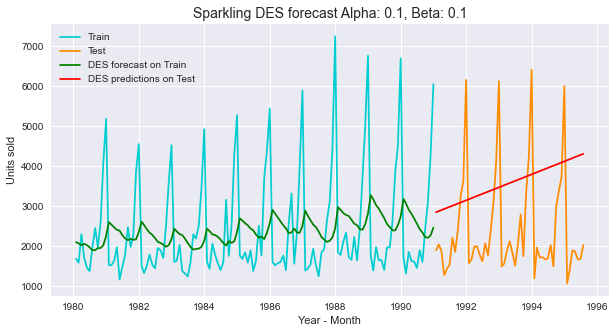

In [243]:
plt.figure(figsize=(10,5))
plt.plot(DES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_spark', 0.1, 0.1], color = 'red', label='DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast Alpha: 0.1, Beta: 0.1', fontsize=14)
plt.legend(loc='best')

Trying auto fit by the model

In [244]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [245]:
model_DES_autofit.params

{'smoothing_level': 0.6478112025162996,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1686.0826224342366,
 'initial_slope': 27.064245197810123,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [246]:
alpha = model_DES_autofit.params['smoothing_level']
beta = model_DES_autofit.params['smoothing_slope']
alpha_6_1 = alpha
beta_6_1 = beta

In [247]:
DES_train['predict_spark',alpha,beta] = model_DES_autofit.fittedvalues
DES_train.head()

,Sparkling,"(predict_spark, 0.1, 0.1)","(predict_spark, 0.1, 0.2)","(predict_spark, 0.1, 0.30000000000000004)","(predict_spark, 0.1, 0.4)","(predict_spark, 0.1, 0.5)","(predict_spark, 0.1, 0.6)","(predict_spark, 0.1, 0.7000000000000001)","(predict_spark, 0.1, 0.8)","(predict_spark, 0.1, 0.9)",...,"(predict_spark, 1.0, 0.2)","(predict_spark, 1.0, 0.30000000000000004)","(predict_spark, 1.0, 0.4)","(predict_spark, 1.0, 0.5)","(predict_spark, 1.0, 0.6)","(predict_spark, 1.0, 0.7000000000000001)","(predict_spark, 1.0, 0.8)","(predict_spark, 1.0, 0.9)","(predict_spark, 1.0, 1.0)","(predict_spark, 0.6478112025162996, 0.0)"
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
1980-01-31,1686,2102.097902,1686.00000,1686.000000,1686.00000,1686.000000,1686.00000,1686.000000,1686.00000,1686.000000,...,1685.569471,1686.413931,1686.662425,1686.502371,1687.002186,1685.490751,1686.392505,1700.0000,1733.342388,1713.146868
1980-02-29,1591,2069.071904,1686.00000,1686.000000,1686.00000,1686.000000,1686.00000,1686.000000,1686.00000,1686.000000,...,1742.611374,1740.914797,1738.363400,1737.944397,1736.867117,1728.075132,1700.720168,1673.4000,1638.657612,1722.625068
1980-03-31,2304,2025.067787,1674.60000,1673.650000,1672.70000,1671.750000,1670.80000,1669.850000,1668.90000,1667.950000,...,1617.289100,1600.940358,1584.418040,1569.472199,1554.346847,1537.122540,1517.944034,1504.2400,1496.000000,1664.421120
1980-04-30,1712,2059.553403,1748.22800,1752.745500,1757.28200,1761.837500,1766.41200,1771.005500,1775.61800,1780.249500,...,2467.631280,2524.858250,2585.250824,2649.736099,2717.138739,2786.936762,2859.788807,2937.0240,3017.000000,2105.811728
1980-05-31,1471,2027.914924,1754.56864,1763.509085,1772.39452,1781.224375,1789.99808,1798.715065,1807.37476,1815.976595,...,1724.505024,1689.000775,1643.950494,1588.868050,1522.055495,1442.481029,1349.557761,1242.5024,1120.000000,1877.760324


In [248]:
DES_test['predict_spark',alpha,beta] = model_DES_autofit.forecast(len(test['Sparkling']))
DES_test.head()

,Sparkling,"(predict_spark, 0.1, 0.1)","(predict_spark, 0.1, 0.2)","(predict_spark, 0.1, 0.30000000000000004)","(predict_spark, 0.1, 0.4)","(predict_spark, 0.1, 0.5)","(predict_spark, 0.1, 0.6)","(predict_spark, 0.1, 0.7000000000000001)","(predict_spark, 0.1, 0.8)","(predict_spark, 0.1, 0.9)",...,"(predict_spark, 1.0, 0.2)","(predict_spark, 1.0, 0.30000000000000004)","(predict_spark, 1.0, 0.4)","(predict_spark, 1.0, 0.5)","(predict_spark, 1.0, 0.6)","(predict_spark, 1.0, 0.7000000000000001)","(predict_spark, 1.0, 0.8)","(predict_spark, 1.0, 0.9)","(predict_spark, 1.0, 1.0)","(predict_spark, 0.6478112025162996, 0.0)"
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
1991-01-31,1902,2848.796177,2732.759960,2733.320241,2790.953865,2813.035928,2763.266021,2672.114992,2581.231156,2544.289542,...,6719.319012,6986.301520,7193.228079,7353.141982,7479.950925,7583.467265,7670.113850,7744.142473,7808.0,5281.501396
1991-02-28,2049,2875.807228,2796.262166,2855.378931,2969.202939,3034.520397,3023.744712,2981.546453,2961.700743,3021.087678,...,7391.638024,7925.603039,8339.456158,8659.283963,8912.901849,9119.934529,9293.227700,9441.284946,9569.0,5308.565641
1991-03-31,1874,2902.818280,2859.764372,2977.437620,3147.452012,3256.004866,3284.223403,3290.977915,3342.170329,3497.885814,...,8063.957036,8864.904559,9485.684237,9965.425945,10345.852774,10656.401794,10916.341550,11138.427419,11330.0,5335.629886
1991-04-30,1279,2929.829331,2923.266578,3099.496310,3325.701085,3477.489335,3544.702094,3600.409376,3722.639915,3974.683950,...,8736.276049,9804.206078,10631.912316,11271.567926,11778.803699,12192.869059,12539.455401,12835.569892,13091.0,5362.694132
1991-05-31,1432,2956.840382,2986.768784,3221.555000,3503.950159,3698.973804,3805.180785,3909.840838,4103.109502,4451.482087,...,9408.595061,10743.507598,11778.140395,12577.709908,13211.754624,13729.336323,14162.569251,14532.712365,14852.0,5389.758377


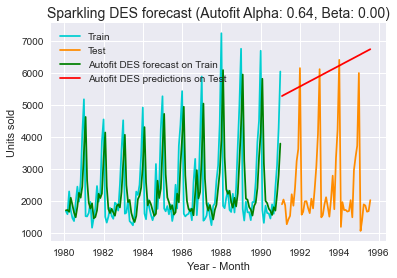

In [249]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_spark',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_spark',alpha,beta], color = 'red', label='Autofit DES predictions on Test')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast (Autofit Alpha: 0.64, Beta: 0.00)', fontsize=14);
plt.legend(loc='best')

In [250]:
rmse_spark_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta],squared=False)
mape_spark_model6_train = MAPE(DES_train['Sparkling'],DES_train['predict_spark',alpha,beta])
        
rmse_spark_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta],squared=False)
mape_spark_model6_test = MAPE(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta])

resultsDf_6 = resultsDf_6.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_spark_model6_train
                                      ,'Train MAPE': mape_spark_model6_train,'Test RMSE':rmse_spark_model6_test
                                      ,'Test MAPE':mape_spark_model6_test}, ignore_index=True)

In [251]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

,Alpha,Beta,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.100000,0.1,1363.47000,44.26,1779.4300,67.23
1,0.100000,0.2,1401.76000,45.65,2599.7900,95.44
10,0.200000,0.1,1412.03000,46.62,3611.7700,135.41
100,0.647811,0.0,1337.48427,39.11,3851.1715,152.07
2,0.100000,0.3,1435.33000,46.85,4290.1300,155.32


In [252]:
resultsDf_6.sort_values(by=['Test MAPE']).head()

,Alpha,Beta,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.100000,0.1,1363.47000,44.26,1779.4300,67.23
1,0.100000,0.2,1401.76000,45.65,2599.7900,95.44
10,0.200000,0.1,1412.03000,46.62,3611.7700,135.41
100,0.647811,0.0,1337.48427,39.11,3851.1715,152.07
2,0.100000,0.3,1435.33000,46.85,4290.1300,155.32


### Model Evaluation

In [253]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][100]],
                              'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][100]]}
                           ,index=['DES Alpha 0.1,Beta 0.1','DES Alpha 0.6,Beta 0.0'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_6_1])
spark_resultsDf


,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverage,1275.081804,38.90
2 point MA,813.400684,19.70
4 point MA,1156.589694,35.96
6 point MA,1283.927428,43.86
9 point MA,1346.278315,46.86
SES Alpha 0.00,1275.081823,38.90
"DES Alpha 0.1,Beta 0.1",1779.430000,67.23
"DES Alpha 0.6,Beta 0.0",3851.171500,152.07


### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [254]:
TES_train = train.copy()
TES_test = test.copy()

In [255]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')


In [256]:
resultsDf_7_1 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_spark',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_spark',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Sparkling']))
        
            rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',i,j,k],squared=False)
            mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',i,j,k])
        
            rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',i,j,k],squared=False)
            mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',i,j,k])
        
            resultsDf_7_1 = resultsDf_7_1.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_spark_model7_train
                                      ,'Train MAPE': mape_spark_model7_train,'Test RMSE':rmse_spark_model7_test
                                      ,'Test MAPE': mape_spark_model7_test}, ignore_index=True)

In [257]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

,Alpha,Beta,Gamma,Train RMSE,Train MAPE,Test RMSE,Test MAPE
301,0.4,0.1,0.2,373.281410,11.05,312.211095,10.20
211,0.3,0.2,0.2,377.346884,11.23,315.195004,10.07
300,0.4,0.1,0.1,370.807398,11.06,318.281180,10.00
402,0.5,0.1,0.3,390.181794,11.54,325.690492,9.99
403,0.5,0.1,0.4,401.059753,11.55,343.321993,11.07


In [258]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

,Alpha,Beta,Gamma,Train RMSE,Train MAPE,Test RMSE,Test MAPE
402,0.5,0.1,0.3,390.181794,11.54,325.690492,9.99
300,0.4,0.1,0.1,370.807398,11.06,318.281180,10.00
211,0.3,0.2,0.2,377.346884,11.23,315.195004,10.07
301,0.4,0.1,0.2,373.281410,11.05,312.211095,10.20
401,0.5,0.1,0.2,384.608362,11.44,344.182438,10.67


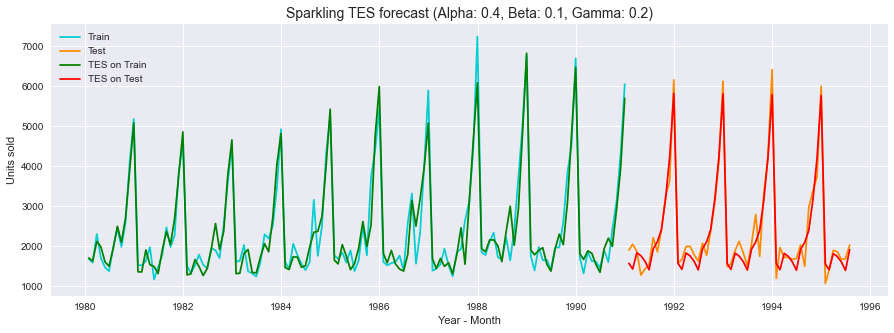

In [259]:
plt.figure(figsize=(15,5))
plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_spark', 0.4, 0.1, 0.2], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark', 0.4, 0.1, 0.2], color='red', label='TES on Test')

#plt.plot(TES_train['predict_spark', 0.5, 0.1, 0.3], color = 'green', label='Alpha=0.5,Beta=0.1,Gamma=0.3,TES on Train')
#plt.plot(TES_test['predict_spark', 0.5, 0.1, 0.3], color='red', label='Alpha=0.5,Beta=0.1,Gamma=0.3,TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Alpha: 0.4, Beta: 0.1, Gamma: 0.2)', fontsize=14)

plt.legend(loc='best')

### Attempt Autofit of TES

In [260]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [261]:
model_TES_autofit.params

{'smoothing_level': 0.15443133706629503,
 'smoothing_slope': 6.108874921042356e-28,
 'smoothing_seasonal': 0.371166173081257,
 'damping_slope': nan,
 'initial_level': 1639.9993396930959,
 'initial_slope': 4.884798825583997,
 'initial_seasons': array([1.00840895, 0.9689857 , 1.24171518, 1.13204491, 0.93985543,
        0.93813662, 1.22454056, 1.54418856, 1.27332316, 1.63188742,
        2.48260217, 3.11818407]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [262]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_slope']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_1 = alpha
beta_7_1 = beta
gamma_7_1 = gamma

In [263]:
TES_train['predict_spark',alpha,beta,gamma] = model_TES_autofit.fittedvalues

In [264]:
TES_test['predict_spark',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Sparkling']))

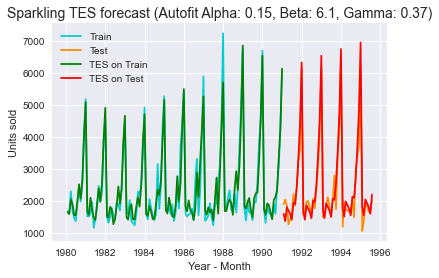

In [265]:
plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_spark',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_spark',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Autofit Alpha: 0.15, Beta: 6.1, Gamma: 0.37)', fontsize=14)

plt.legend(loc='best')

In [266]:
rmse_spark_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_train = MAPE(TES_train['Sparkling'],TES_train['predict_spark',alpha,beta,gamma])
        
rmse_spark_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma],squared=False)
mape_spark_model7_test = MAPE(TES_test['Sparkling'],TES_test['predict_spark',alpha,beta,gamma])
        
resultsDf_7_1 = resultsDf_7_1.append({'Alpha':np.round(alpha,2),'Beta':np.round(beta,2),'Gamma':np.round(gamma,2),'Train RMSE':rmse_spark_model7_train
                                      ,'Train MAPE': mape_spark_model7_train,'Test RMSE':rmse_spark_model7_test
                                      ,'Test MAPE': mape_spark_model7_test}, ignore_index=True)

In [267]:
resultsDf_7_1.tail()

,Alpha,Beta,Gamma,Train RMSE,Train MAPE,Test RMSE,Test MAPE
996,1.00,1.0,0.70,93702.603162,1031.58,1.383388e+06,25559.44
997,1.00,1.0,0.80,104677.046328,1039.17,3.959727e+06,55484.79
998,1.00,1.0,0.90,161779.762665,1427.45,5.643065e+05,8672.79
999,1.00,1.0,1.00,239920.545915,1304.98,1.211460e+05,3173.80
1000,0.15,0.0,0.37,353.379117,10.18,3.842030e+02,11.94


In [268]:
resultsDf_7_1.sort_values(by=['Test RMSE']).head()

,Alpha,Beta,Gamma,Train RMSE,Train MAPE,Test RMSE,Test MAPE
301,0.4,0.1,0.2,373.281410,11.05,312.211095,10.20
211,0.3,0.2,0.2,377.346884,11.23,315.195004,10.07
300,0.4,0.1,0.1,370.807398,11.06,318.281180,10.00
402,0.5,0.1,0.3,390.181794,11.54,325.690492,9.99
403,0.5,0.1,0.4,401.059753,11.55,343.321993,11.07


In [269]:
resultsDf_7_1.sort_values(by=['Test MAPE']).head()

,Alpha,Beta,Gamma,Train RMSE,Train MAPE,Test RMSE,Test MAPE
402,0.5,0.1,0.3,390.181794,11.54,325.690492,9.99
300,0.4,0.1,0.1,370.807398,11.06,318.281180,10.00
211,0.3,0.2,0.2,377.346884,11.23,315.195004,10.07
301,0.4,0.1,0.2,373.281410,11.05,312.211095,10.20
401,0.5,0.1,0.2,384.608362,11.44,344.182438,10.67


### Model Evaluation

In [270]:
resultsDf_7_sp = pd.DataFrame({'Test RMSE': [resultsDf_7_1['Test RMSE'][301],resultsDf_7_1['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_1['Test MAPE'][301],resultsDf_7_1['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.4, Beta 0.1, Gamma 0.2','TES Alpha 0.15, Beta 0.00, Gamma 0.37'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_7_sp])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverage,1275.081804,38.90
2 point MA,813.400684,19.70
4 point MA,1156.589694,35.96
6 point MA,1283.927428,43.86
9 point MA,1346.278315,46.86
SES Alpha 0.00,1275.081823,38.90
"DES Alpha 0.1,Beta 0.1",1779.430000,67.23
"DES Alpha 0.6,Beta 0.0",3851.171500,152.07


In [271]:
spark_resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE,Test MAPE
"TES Alpha 0.4, Beta 0.1, Gamma 0.2",312.211095,10.20
"TES Alpha 0.15, Beta 0.00, Gamma 0.37",384.203001,11.94
2 point MA,813.400684,19.70
4 point MA,1156.589694,35.96
SimpleAverage,1275.081804,38.90
SES Alpha 0.00,1275.081823,38.90
6 point MA,1283.927428,43.86
9 point MA,1346.278315,46.86
RegressionOnTime,1389.135175,50.15
"DES Alpha 0.1,Beta 0.1",1779.430000,67.23


Text(0.5, 1.0, 'SPARKLING : Forecast Vs Actual Test set')

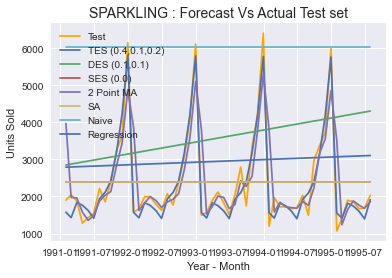

In [272]:

#plt.figure(figsize=(10,15))

#plt.plot(TES_train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(TES_test['Sparkling'], label='Test', color = 'orange')
#TES
#plt.plot(TES_train['predict_spark',0.4,0.1,0.2], label='TES on Train')
#DES
#plt.plot(DES_train['predict_spark',0.1,0.1], label='DES on Train')
#SES
#plt.plot(SES_train['predict_spark'], label='SES on Train')
#MA
#plt.plot(trailing_MovingAverage_train['Spark_Trailing_2'], label='2 Point MA on Train')
#SA
#plt.plot(SimpleAverage_train['spark_mean_forecast'], label='SA on Train')
#Naive
#plt.plot(NaiveModel_train['spark_naive'], label='Naive on Train')
#Regression
#plt.plot(LinearRegression_train['RegOnTime_spark'], label='Regression on Train')

#TES
plt.plot(TES_test['predict_spark',0.4,0.1,0.2],  label='TES (0.4,0.1,0.2)')
#DES
plt.plot(DES_test['predict_spark',0.1,0.1],  label='DES (0.1,0.1)')
#SES
plt.plot(SES_test['predict_spark'],  label='SES (0.0)')
#MA
plt.plot(trailing_MovingAverage_test['Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['spark_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Year - Month')
plt.ylabel('Units Sold')
plt.title('SPARKLING : Forecast Vs Actual Test set', fontsize=14)


### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [273]:
## Test for stationarity of the series - Dicky Fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
 
 #Determing rolling statistics
 rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
 rolstd = timeseries.rolling(window=7).std() #determining the rolling standard 
 #Plot rolling statistics:
 orig = plt.plot(timeseries, color='blue',label='Original')
 mean = plt.plot(rolmean, color='red', label='Rolling Mean')
 std = plt.plot(rolstd, color='black', label = 'Rolling Std')
 plt.legend(loc='best')
 plt.title('Rolling Mean & Standard Deviation')
 plt.show(block=False)
 
 #Perform Dickey-Fuller test:
 print ('Results of Dickey-Fuller Test:')
 dftest = adfuller(timeseries, autolag='AIC')
 dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
 for key,value in dftest[4].items():
     dfoutput['Critical Value (%s)'%key] = value
 print (dfoutput,'\n')

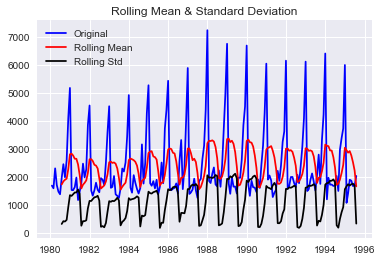

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [274]:
test_stationarity(df_spark['Sparkling'])


We see that at 5% significant level the Time Series is non-stationary.
Let us take a difference of order 1 and check whether the Time Series is stationary or not.

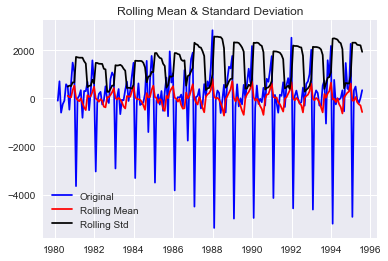

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [275]:
test_stationarity(df_spark['Sparkling'].diff().dropna())


We see that at 5% significant level the Time Series is non-stationary. But the seasonality is multiplicative as the Std deviation and mean varies according to the change in trend
Let us take a difference of order 1 and check whether the Time Series is stationary or not.
Difference of original series

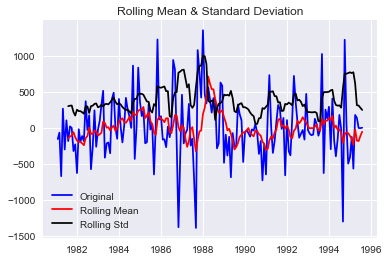

Results of Dickey-Fuller Test:
Test Statistic                  -4.460165
p-value                          0.000232
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [276]:
test_stationarity(df_spark['Sparkling'].diff(12).dropna())

We see that at 𝛼 = 0.05 the Time Series is indeed stationary.

Plot the Autocorrelation and the Partial Autocorrelation function
plots on the whole data.


In [277]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


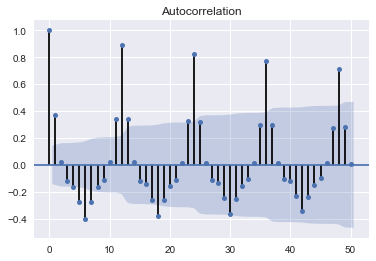

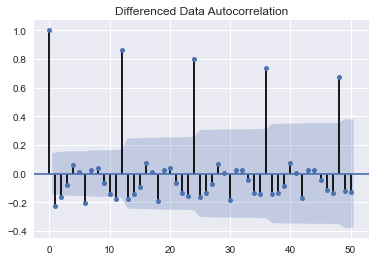

In [278]:
plot_acf(df_spark['Sparkling'],lags=50)
plot_acf(df_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()


On the first order difference we got the q value as 2 we will be using this value on the optimum model build

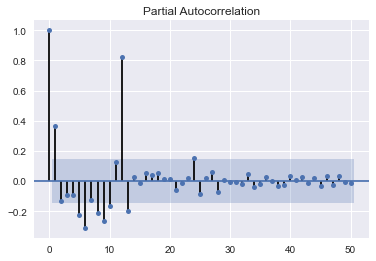

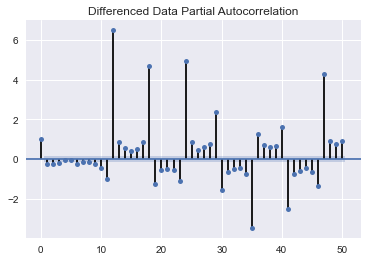

In [279]:
#PACF PLOTS
plot_pacf(df_spark['Sparkling'],lags=50,method='ywmle')
plot_pacf(df_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()


From the above plots, we can say that there seems to be a seasonality in the data.
On the first order difference we got the p value as 3 we will be using this value on the optimum model build

### Check for stationarity of the Training Data Time Series.

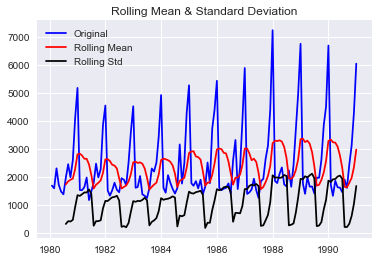

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [280]:
test_stationarity(train['Sparkling'])


We see that the series is not stationary at 𝛼 = 0.05.

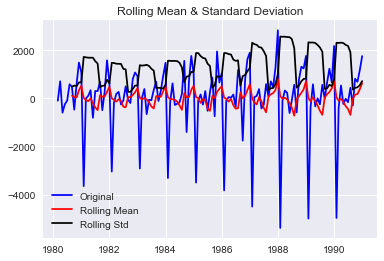

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [281]:
test_stationarity(train['Sparkling'].diff(1).dropna())

SARIMA MODEL

In [282]:


SARIMA_train = train.copy()
SARIMA_test = test.copy()

Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [123]:
import itertools
p = q = range(0,4)
d= range(1,2)
D = range(1,2)
#p = q = range(0,1)
#d= range(0,1)
#D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [283]:
SARIMA_AIC_spark = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark

,param,seasonal,AIC


In [125]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark = SARIMA_model_spark.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark.aic))
        SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.862633467892
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.6773574256167
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:3254.615128927966
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.3243908186098
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.5289621307393
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:6115.821681957274
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.5000981866626
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1455.9911553679801
SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:6096.672370063988
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:1289.239819743992
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:1291.2448875094258
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:1288.6070380299634
SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:3324.4756779426125
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1760.6565719828561
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.663923423004

SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:1571.8577388009155
SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:1401.910419970676
SARIMA(2, 1, 1)x(1, 1, 3, 12)7 - AIC:6198.377420330448
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:1400.9854069823762
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:1401.9924735466998
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:1403.8183456574484
SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:nan
SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:1228.3132766083033
SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:1230.1483342052882
SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:1230.7597822034786
SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:3283.178871032538
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1742.2930708182369
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:1556.946732412365
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:1384.3176180645232
SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:2501.5262924793833
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:1573.1168644412712
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:1558.1200892470292
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:1386.0972420069518
SARIMA(2, 1

In [284]:
SARIMA_AIC_spark.sort_values(by=['AIC']).head()

,param,seasonal,AIC


In [285]:
auto_SARIMA_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark = auto_SARIMA_spark.fit(maxiter=1000)
print(results_auto_SARIMA_spark.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, 0, 12)   Log Likelihood                -596.641
Date:                            Sun, 16 Jan 2022   AIC                           1213.283
Time:                                    19:54:10   BIC                           1237.103
Sample:                                         0   HQIC                          1222.833
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6142      0.176     -9.178      0.000      -1.959      -1.270
ar.L2         -0.6123      0.299   

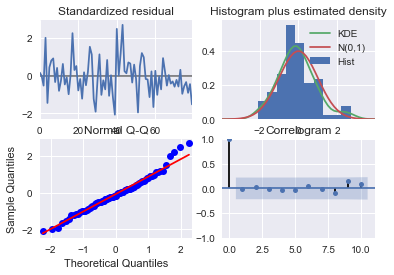

In [286]:
results_auto_SARIMA_spark.plot_diagnostics()
plt.show()

In [287]:
SARIMA_test.head()

,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


In [288]:
#pred_dynamic = results_auto_SARIMA_spark.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=True, full_results=True)
pred_dynamic = results_auto_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [289]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark = results_auto_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.05)


In [290]:
predicted_auto_SARIMA_spark.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1430.940037,431.217152,585.769951,2276.110124
1,1540.593718,458.371657,642.201777,2438.985658
2,1707.573049,460.150008,805.695605,2609.450493
3,1859.061684,466.712497,944.322000,2773.801368
4,1501.732900,467.015830,586.398692,2417.067108


In [291]:
# Extract the predicted and true values of our time series
spark_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_forecasted'] = predicted_auto_SARIMA_spark.predicted_mean
SARIMA_test.head()

,Sparkling,spark_forecasted
Time_Stamp,,
1991-01-31,1902,1430.940037
1991-02-28,2049,1540.593718
1991-03-31,1874,1707.573049
1991-04-30,1279,1859.061684
1991-05-31,1432,1501.732900


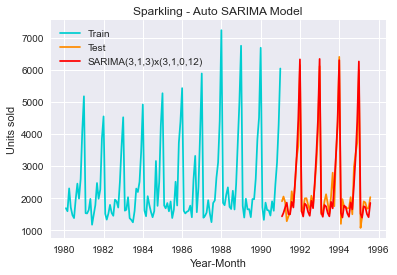

In [292]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_forecasted'], color='red', label='SARIMA(3,1,3)x(3,1,0,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Sparkling - Auto SARIMA Model')
plt.legend(loc='best')

In [293]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 331.586 and MAPE is 10.33


In [294]:
resultsDf_8_spark1 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Auto SARIMA(3,1,3)x(3,1,0,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark1])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverage,1275.081804,38.90
2 point MA,813.400684,19.70
4 point MA,1156.589694,35.96
6 point MA,1283.927428,43.86
9 point MA,1346.278315,46.86
SES Alpha 0.00,1275.081823,38.90
"DES Alpha 0.1,Beta 0.1",1779.430000,67.23
"DES Alpha 0.6,Beta 0.0",3851.171500,152.07


Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.
Let us look at the ACF and the PACF plots once more.

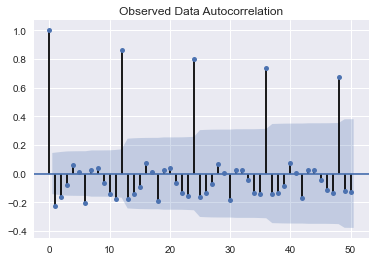

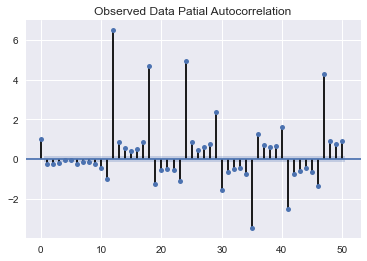

In [295]:
plot_acf(df_spark['Sparkling'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(df_spark['Sparkling'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

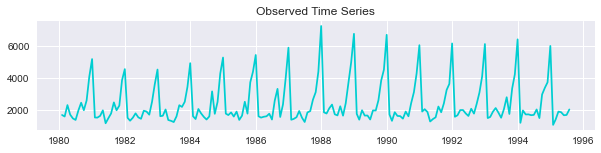

In [296]:
plt.figure(figsize=(10,2))
plt.plot(df_spark['Sparkling'], color = 'darkturquoise')
plt.title ('Observed Time Series');

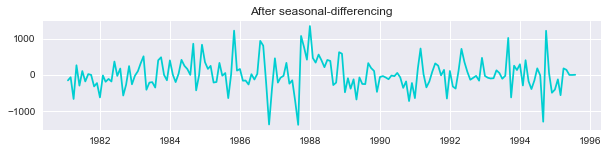

In [297]:
plt.figure(figsize=(10,2))
plt.plot(df_spark['Sparkling'].diff(12).dropna(), color = 'darkturquoise')
plt.title ('After seasonal-differencing');

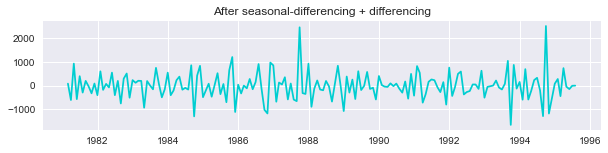

In [298]:
plt.figure(figsize=(10,2))
plt.plot((df_spark['Sparkling'].diff(12).dropna()).diff().dropna(),  color = 'darkturquoise')
plt.title ('After seasonal-differencing + differencing');

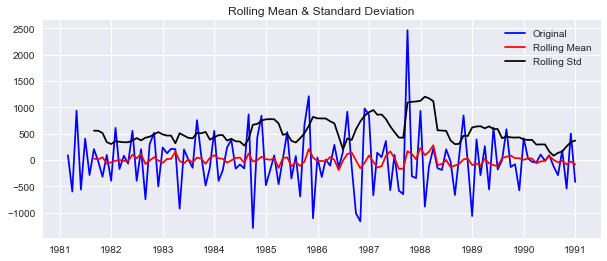

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [299]:
plt.figure(figsize=(10,4))
test_stationarity((SARIMA_train['Sparkling'].diff(12).dropna()).diff().dropna())

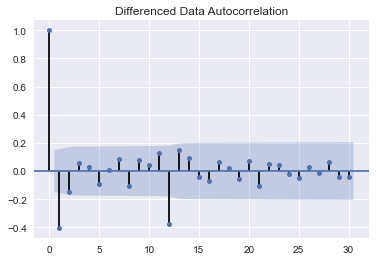

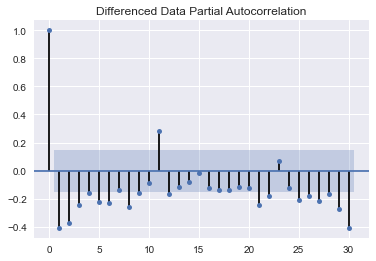

In [300]:
plot_acf((df_spark['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Autocorrelation')
plot_pacf((df_spark['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Partial Autocorrelation');

In [301]:
import statsmodels.api as sm

manual_SARIMA_spark = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),#(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),#(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark = manual_SARIMA_spark.fit(maxiter=1000)
print(results_manual_SARIMA_spark.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, 2, 12)   Log Likelihood                -693.697
Date:                            Sun, 16 Jan 2022   AIC                           1403.394
Time:                                    19:54:28   BIC                           1423.654
Sample:                                         0   HQIC                          1411.574
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.130      1.713      0.087      -0.032       0.478
ar.L2         -0.0798      0.131   

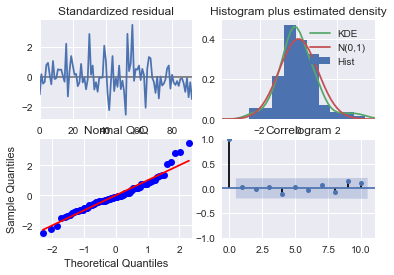

In [302]:
results_manual_SARIMA_spark.plot_diagnostics()
plt.show()

In [303]:
pred_dynamic = results_manual_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [304]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_spark = results_manual_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.5)

In [305]:
predicted_manual_SARIMA_spark.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1579.907186,416.594084,763.397786,2396.416586
1,1419.149468,429.113356,578.102746,2260.196191
2,1868.138565,429.103998,1027.110183,2709.166947
3,1731.467428,430.972791,886.776280,2576.158577
4,1659.817587,431.905829,813.297717,2506.337457


In [306]:
# Extract the predicted and true values of our time series
spark_manual_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_manual_forecasted'] = predicted_manual_SARIMA_spark.predicted_mean
SARIMA_test.head()

,Sparkling,spark_forecasted,spark_manual_forecasted
Time_Stamp,,,
1991-01-31,1902,1430.940037,1579.907186
1991-02-28,2049,1540.593718,1419.149468
1991-03-31,1874,1707.573049,1868.138565
1991-04-30,1279,1859.061684,1731.467428
1991-05-31,1432,1501.732900,1659.817587


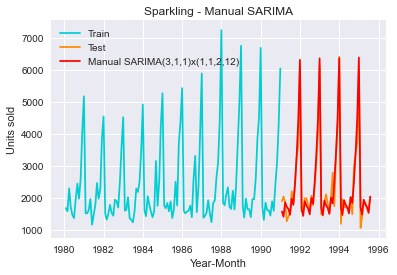

In [307]:
plt.plot(train['Sparkling'], label='Train', color = 'darkturquoise')
plt.plot(test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_manual_forecasted'], color='red', label='Manual SARIMA(3,1,1)x(1,1,2,12)')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - Manual SARIMA')
plt.legend(loc='best')

In [308]:
rmse_spark_model8_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_manual_forecasted'],squared=False)
mape_spark_model8_test = MAPE(test['Sparkling'],SARIMA_test['spark_manual_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 324.105 and MAPE is 9.48


In [309]:
resultsDf_8_spark3 = pd.DataFrame({'Test RMSE': [rmse_spark_model8_test],'Test MAPE': [mape_spark_model8_test]},index=['Manual SARIMA(3,1,1)x(1,1,2,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_spark3])
spark_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverage,1275.081804,38.90
2 point MA,813.400684,19.70
4 point MA,1156.589694,35.96
6 point MA,1283.927428,43.86
9 point MA,1346.278315,46.86
SES Alpha 0.00,1275.081823,38.90
"DES Alpha 0.1,Beta 0.1",1779.430000,67.23
"DES Alpha 0.6,Beta 0.0",3851.171500,152.07


###### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.
9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [310]:
spark_resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE,Test MAPE
"TES Alpha 0.4, Beta 0.1, Gamma 0.2",312.211095,10.20
"Manual SARIMA(3,1,1)x(1,1,2,12)",324.105224,9.48
"Auto SARIMA(3,1,3)x(3,1,0,12)",331.585770,10.33
"TES Alpha 0.15, Beta 0.00, Gamma 0.37",384.203001,11.94
2 point MA,813.400684,19.70
4 point MA,1156.589694,35.96
SimpleAverage,1275.081804,38.90
SES Alpha 0.00,1275.081823,38.90
6 point MA,1283.927428,43.86
9 point MA,1346.278315,46.86


Plot all the forecast

Text(0.5, 1.0, 'SPARKLING : Forecasts Vs Test Data')

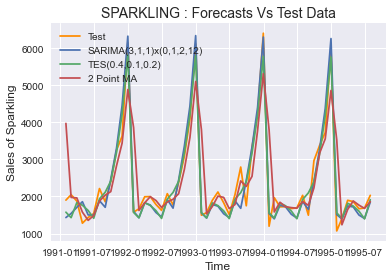

In [311]:
#plt.figure(figsize=(20,12))

#plt.plot(TES_train['Sparkling'], label='Train', color = 'purple')
plt.plot(TES_test['Sparkling'], label='Test', color = 'darkorange')

#SARIMA
plt.plot(SARIMA_test['spark_forecasted'],  label='SARIMA(3,1,1)x(0,1,2,12)')
#TES
plt.plot(TES_test['predict_spark',0.4,0.1,0.2],  label='TES(0.4,0.1,0.2)')
#DES
#plt.plot(DES_test['predict_spark',0.1,0.1],  label='DES')
#SES
#plt.plot(SES_test['predict_spark'],  label='SES')
#MA
plt.plot(trailing_MovingAverage_test['Trailing_2'],  label='2 Point MA')
#SA
#plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SA')
#Naive
#plt.plot(NaiveModel_test['spark_naive'], label='Naive')
#Regression
#plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : Forecasts Vs Test Data', fontsize=14)

Build model on all of the dataset using best model, which is TES

In [312]:
model_TES_spark = ExponentialSmoothing(df_spark['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_spark_fit = model_TES_spark.fit(smoothing_level=0.4,smoothing_slope=0.1,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_spark_forecast = model_TES_spark_fit.forecast(steps=12)

In [313]:
rmse_spark_tes_full = metrics.mean_squared_error(df_spark['Sparkling'],model_TES_spark_fit.fittedvalues,squared=False)
mape_spark_tes_full = MAPE(df_spark['Sparkling'],model_TES_spark_fit.fittedvalues)
print("TES forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_tes_full, mape_spark_tes_full))

TES forecast on the Sparkling Full Data:  RMSE is 376.821 and MAPE is 11.30


Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast using TES Model')

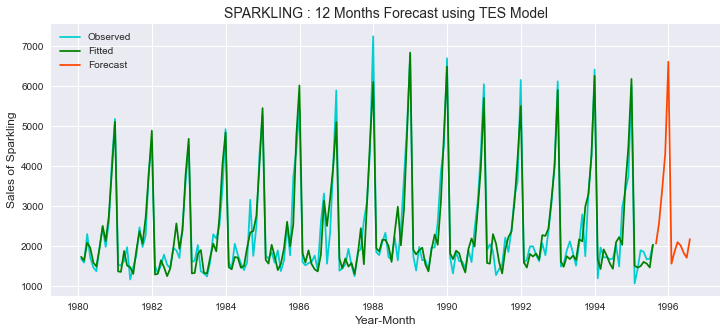

In [314]:
plt.figure(figsize=(12,5))

plt.plot(df_spark['Sparkling'], label='Observed', color = 'darkturquoise')
plt.plot(model_TES_spark_fit.fittedvalues, label='Fitted', color = 'green')
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.legend(loc='upper left')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using TES Model', fontsize=14)


Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

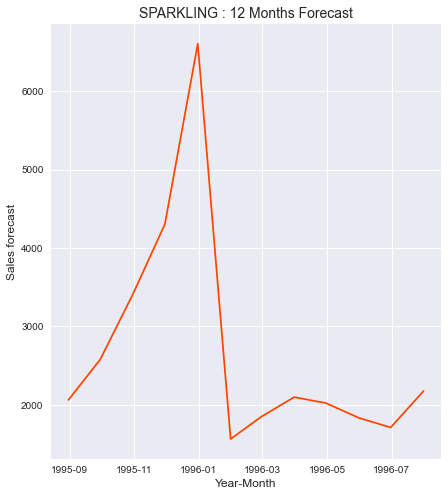

In [315]:
plt.figure(figsize=(7,8))
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast', fontsize=14)

Attempt SARIMA(3,1,1)x(1,1,2,12) for forecast¶

In [316]:
spark_full_data_model = sm.tsa.statespace.SARIMAX(df_spark['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(1, 1,2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_spark = spark_full_data_model.fit(maxiter=1000)
print(results_full_data_model_spark.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(1, 1, 2, 12)   Log Likelihood               -1078.437
Date:                            Sun, 16 Jan 2022   AIC                           2176.875
Time:                                    19:55:03   BIC                           2206.711
Sample:                                01-31-1980   HQIC                          2188.998
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4230      0.086     -4.916      0.000      -0.592      -0.254
ar.L2         -0.9094      0.053   

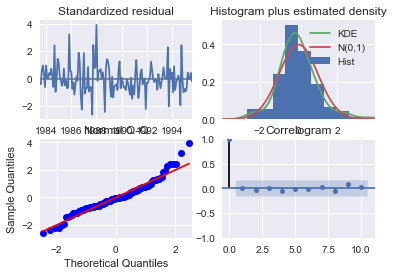

In [317]:
results_full_data_model_spark.plot_diagnostics();

In [318]:
predicted_spark_SARIMA_full_data = results_full_data_model_spark.get_forecast(steps=12)

In [319]:
predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1873.375038,384.484288,1119.799680,2626.950396
1995-09-30,2445.071439,389.492992,1681.679202,3208.463676
1995-10-31,3312.745074,390.187070,2547.992469,4077.497679
1995-11-30,3994.669783,390.695954,3228.919785,4760.419781
1995-12-31,6084.214880,390.825717,5318.210550,6850.219210


In [320]:
rmse_spark_sarima_full = metrics.mean_squared_error(df_spark['Sparkling'],results_full_data_model_spark.fittedvalues,squared=False)
mape_spark_sarima_full = MAPE(df_spark['Sparkling'],results_full_data_model_spark.fittedvalues)
print("For SARIMA forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_sarima_full, mape_spark_sarima_full))

For SARIMA forecast on the Sparkling Full Data:  RMSE is 591.252 and MAPE is 14.86


In [321]:
df_spark.tail()

,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


In [322]:
pred_full_manual_SARIMA_date = predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

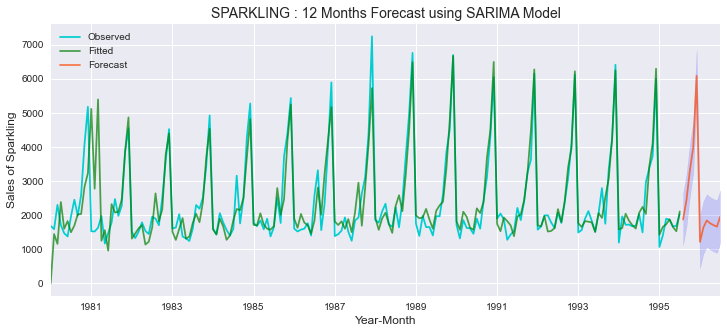

In [323]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,5))

axis = df_spark['Sparkling'].plot(label='Observed', color = 'darkturquoise')
results_full_data_model_spark.fittedvalues.plot(ax=axis, label='Fitted', alpha=0.7, color = 'green')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()


Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

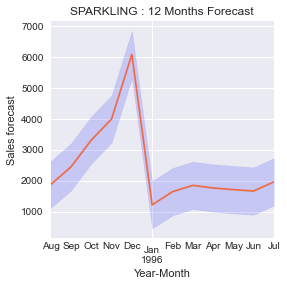

In [324]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SPARKLING : 12 Months Forecast', fontsize=12)


In [325]:
forecast = pd.DataFrame({'Sparkling':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

,Sparkling
1995-08-31,1873.38
1995-09-30,2445.07
1995-10-31,3312.75
1995-11-30,3994.67
1995-12-31,6084.21
1996-01-31,1216.28
1996-02-29,1640.61
1996-03-31,1847.32
1996-04-30,1762.20
1996-05-31,1708.40


In [326]:
forecast.describe()

,Sparkling
count,12.000000
mean,2459.190833
std,1384.633922
min,1216.280000
25%,1697.287500
50%,1860.350000
75%,2661.990000
max,6084.210000
